## Basic Image Data Analysis Using Numpy and OpenCV – Part 1

In [1]:
%matplotlib inline
import os
import imageio
import matplotlib.pyplot as plt
import numpy as np
import scipy.special
import scipy.ndimage
import logging 

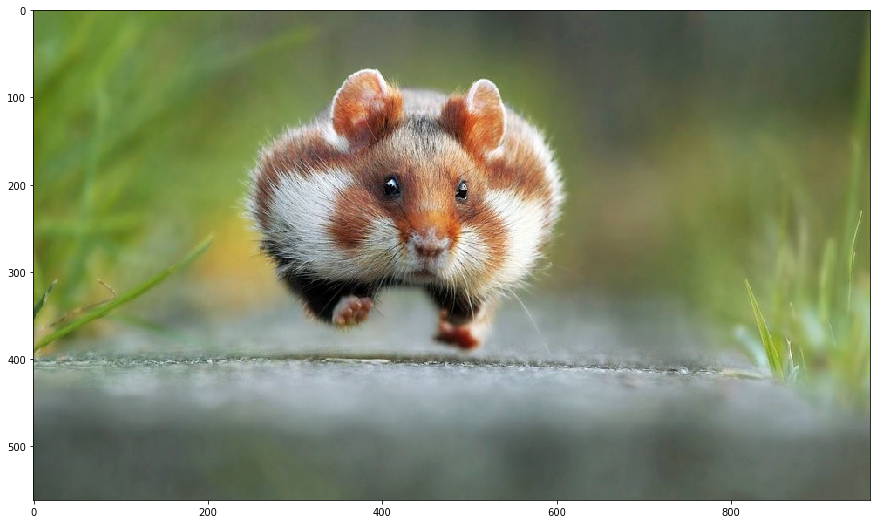

In [2]:
pic=imageio.imread('https://www.kdnuggets.com/wp-content/uploads/image-fig1.jpg')
plt.figure(figsize=(15,15))
plt.imshow(pic)

#### Observe Basic Properties of Image

In [3]:
print('Type of the image : ',type(pic))
print()
print('Shape of the image : {}'.format(pic.shape))
print('Image Hight {}'.format(pic.shape[0]))
print('Image Width {}'.format(pic.shape[1]))
print('Dimension of Image {}'.format(pic.ndim))

Type of the image :  <class 'imageio.core.util.Array'>

Shape of the image : (562, 960, 3)
Image Hight 562
Image Width 960
Dimension of Image 3


In [4]:
print('Image size {}'.format(pic.size))

print('Maximum RGB value in this image {}'.format(pic.max()))

print('Minimum RGB value in this image {}'.format(pic.min()))

Image size 1618560
Maximum RGB value in this image 255
Minimum RGB value in this image 0


In [5]:
'''

Let's pick a specific pixel located at 100 th Rows and 50 th Column. 

And view the RGB value gradually. 

'''

pic[100, 50 ]

Array([109, 143,  46], dtype=uint8)

In [6]:
print('Value of only R channel {}'.format(pic[ 100, 50, 0]))

print('Value of only G channel {}'.format(pic[ 100, 50, 1]))

print('Value of only B channel {}'.format(pic[ 100, 50, 2]))

Value of only R channel 109
Value of only G channel 143
Value of only B channel 46


#### A quick view of each channels in the whole image

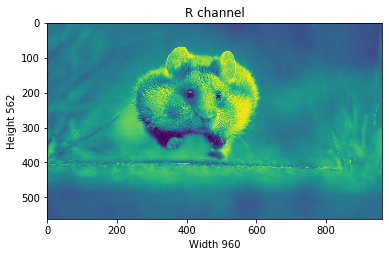

In [7]:
plt.title('R channel')

plt.ylabel('Height {}'.format(pic.shape[0]))

plt.xlabel('Width {}'.format(pic.shape[1]))

plt.imshow(pic[ : , : , 0])

plt.show()

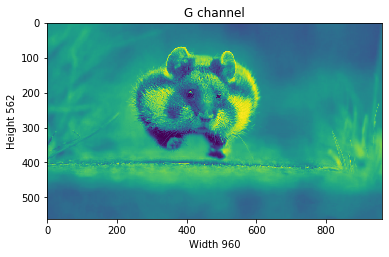

In [8]:
plt.title('G channel')

plt.ylabel('Height {}'.format(pic.shape[0]))

plt.xlabel('Width {}'.format(pic.shape[1]))

plt.imshow(pic[ : , : , 1])

plt.show()


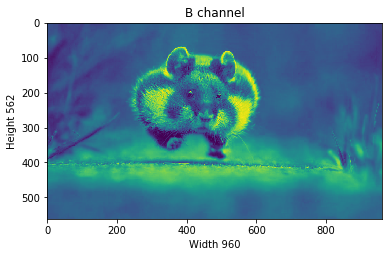

In [9]:
plt.title('B channel')

plt.ylabel('Height {}'.format(pic.shape[0]))

plt.xlabel('Width {}'.format(pic.shape[1]))

plt.imshow(pic[ : , : , 2])

plt.show()

As an example, let’s set the Red, Green, Blue layer for following Rows values to full intensity.

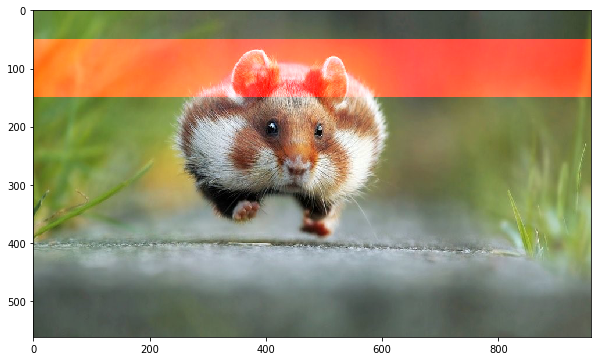

In [10]:
pic =imageio.imread('/Users/martin/Desktop/2020Spring/CSCI420/ps0/demo2.jpg')

pic[50:150 , : , 0] =255# full intensity to those pixel's R channel

plt.figure( figsize= (10,10))

plt.imshow(pic)

plt.show()


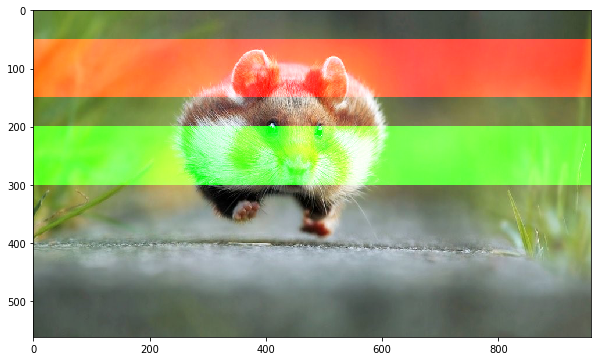

In [11]:
pic[200:300 , : , 1] =255# full intensity to those pixel's G channel

plt.figure( figsize= (10,10))

plt.imshow(pic)

plt.show()

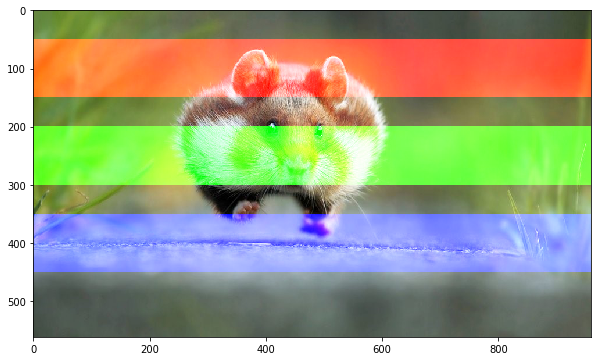

In [12]:
pic[350:450 , : , 2] =255# full intensity to those pixel's B channel

plt.figure( figsize= (10,10))

plt.imshow(pic)

plt.show()

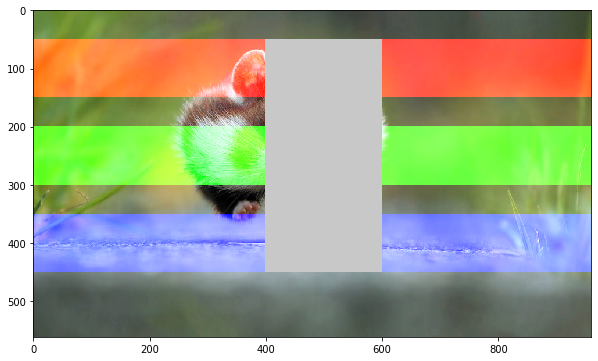

In [13]:
pic[50:450 , 400:600 , [0,1,2] ] =200

plt.figure( figsize= (10,10))

plt.imshow(pic)

plt.show()

#### Splitting Layers

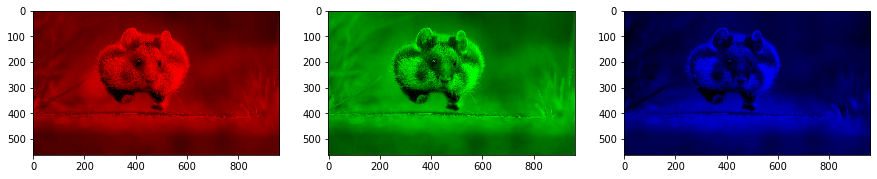

In [14]:
pic = imageio.imread('/Users/martin/Desktop/2020Spring/CSCI420/ps0/demo2.jpg') 

fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5)) 

for c,ax in zip(range(3),ax): 
    # create zero matrix
    split_img=np.zeros(pic.shape,dtype="uint8") # 'dtype' by default: 'numpy.float64' 
    split_img[:,:,c]=pic[:,:,c] # assing each channel 
    ax.imshow(split_img) # display each channel)

#### Greyscale

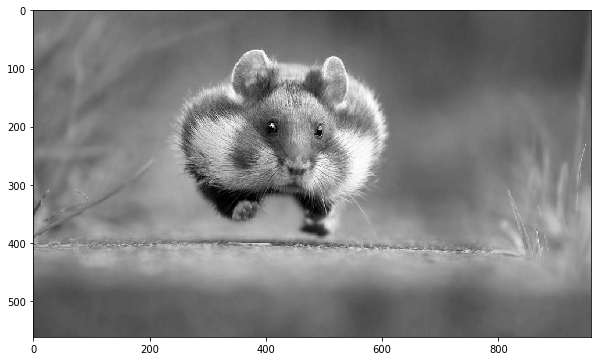

In [15]:
pic=imageio.imread('/Users/martin/Desktop/2020Spring/CSCI420/ps0/demo2.jpg') 
gray=lambda rgb:np.dot(rgb[...,:3],[0.299,0.587,0.114])
gray=gray(pic) 
plt.figure(figsize=(10,10))
plt.imshow(gray,cmap=plt.get_cmap(name='gray'))
plt.show()

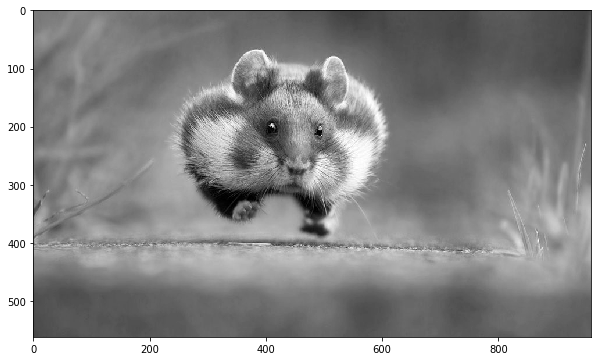

Type of the image :  <class 'imageio.core.util.Array'>

Shape of the image : (562, 960)
Image Hight 562
Image Width 960
Dimension of Image 2

Image size 539520
Maximum RGB value in this image 254.99999999999997
Minimum RGB value in this image 0.0
Random indexes [X,Y] : 129.07


In [16]:
pic=imageio.imread('/Users/martin/Desktop/2020Spring/CSCI420/ps0/demo2.jpg') 

gray=lambda rgb:np.dot(rgb[...,:3],[0.21,0.72,0.07])

gray=gray(pic) 

plt.figure(figsize=(10,10))

plt.imshow(gray,cmap=plt.get_cmap(name='gray'))

plt.show() 

'''Let's take a quick overview some the changed properties now the color image.
Like we observe some properties of color image, 
same statements are applying now for gray scaled image.''' 

print('Type of the image : ',type(gray))

print() 

print('Shape of the image : {}'.format(gray.shape))

print('Image Hight {}'.format(gray.shape[0]))

print('Image Width {}'.format(gray.shape[1]))

print('Dimension of Image {}'.format(gray.ndim))

print() 

print('Image size {}'.format(gray.size))

print('Maximum RGB value in this image {}'.format(gray.max()))

print('Minimum RGB value in this image {}'.format(gray.min()))

print('Random indexes [X,Y] : {}'.format(gray[100,50]))

## Preprocessing for Deep Learning: From covariance matrix to image whitening

### Background

#### Variance and covariance

In [17]:
import seaborn as sns

In [18]:
A = np.array([[1, 3, 5], [5, 4, 1], [3, 8, 6]])
A

array([[1, 3, 5],
       [5, 4, 1],
       [3, 8, 6]])

In [19]:
np.cov(A, rowvar=False, bias=True)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

In [20]:
def calculateCovariance(X):
    meanX = np.mean(X, axis = 0)
    lenX = X.shape[0]
    X = X - meanX
    covariance = X.T.dot(X)/lenX
    return covariance

In [21]:
calculateCovariance(A)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

#### Variance and covariance

In [22]:
def plotDataAndCov(data):
    ACov = np.cov(data, rowvar=False, bias=True)
    print('Covariance matrix:\n', ACov)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(10, 10)

    ax0 = plt.subplot(2, 2, 1)
    
    # Choosing the colors
    cmap = sns.color_palette("GnBu", 10)
    sns.heatmap(ACov, cmap=cmap, vmin=0)

    ax1 = plt.subplot(2, 2, 2)
    
    # data can include the colors
    if data.shape[1]==3:
        c=data[:,2]
    else:
        c="#0A98BE"
    ax1.scatter(data[:,0], data[:,1], c=c, s=40)
    
    # Remove the top and right axes from the data plot
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

#### Simulating data

##### Uncorrelated data

In [23]:
np.random.seed(1234)
a1 = np.random.normal(2, 1, 300)
a2 = np.random.normal(1, 1, 300)
A = np.array([a1, a2]).T
A.shape

(300, 2)

In [24]:
A[:10,:]

array([[ 2.47143516,  1.52704645],
       [ 0.80902431,  1.7111124 ],
       [ 3.43270697,  0.78245452],
       [ 1.6873481 ,  3.63779121],
       [ 1.27941127, -0.74213763],
       [ 2.88716294,  0.90556519],
       [ 2.85958841,  2.43118375],
       [ 1.3634765 ,  1.59275845],
       [ 2.01569637,  1.1702969 ],
       [-0.24268495, -0.75170595]])

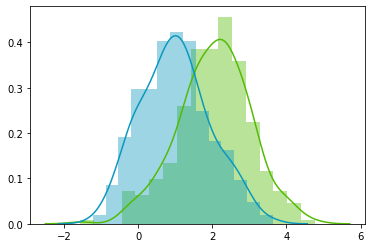

In [25]:
sns.distplot(A[:,0], color="#53BB04")
sns.distplot(A[:,1], color="#0A98BE")
plt.show()
plt.close()

Covariance matrix:
 [[ 0.95171641 -0.0447816 ]
 [-0.0447816   0.87959853]]


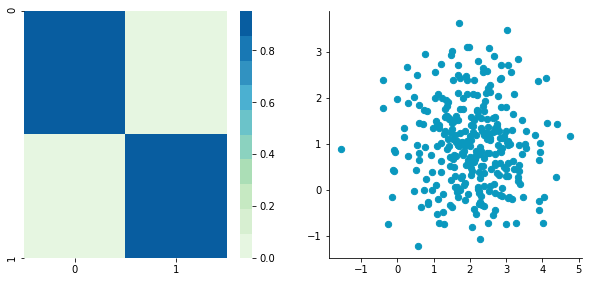

In [26]:
plotDataAndCov(A)
plt.show()
plt.close()

##### Correlated data

Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


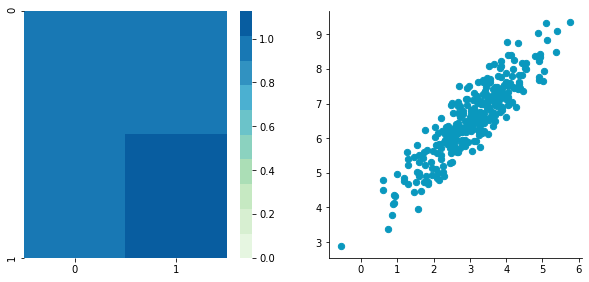

In [27]:
np.random.seed(1234)
b1 =  np.random.normal(3, 1, 300)
b2 = b1 + np.random.normal(7, 1, 300)/2.
B = np.array([b1, b2]).T
plotDataAndCov(B)
plt.show()
plt.close()

### Preprocessing

#### Mean normalization

In [28]:
def center(X):
    newX = X - np.mean(X, axis = 0)
    return newX

Before:


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


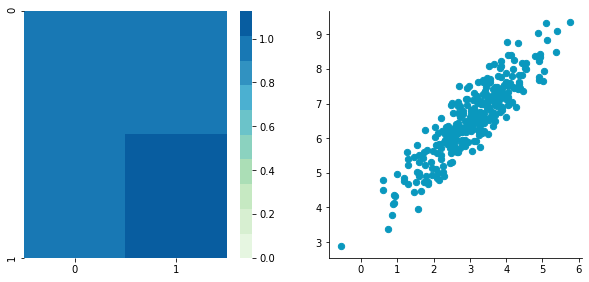

After:


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


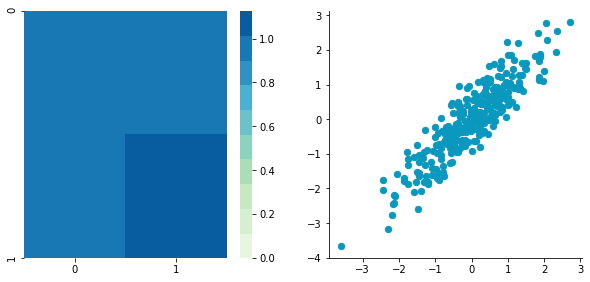

In [29]:
BCentered = center(B)

print('Before:\n\n')

plotDataAndCov(B)
plt.show()
plt.close()

print('After:\n\n')

plotDataAndCov(BCentered)
plt.show()
plt.close()

#### Standardization or normalization

In [30]:
def standardize(X):
    newX = center(X)/np.std(X, axis = 0)
    return newX

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


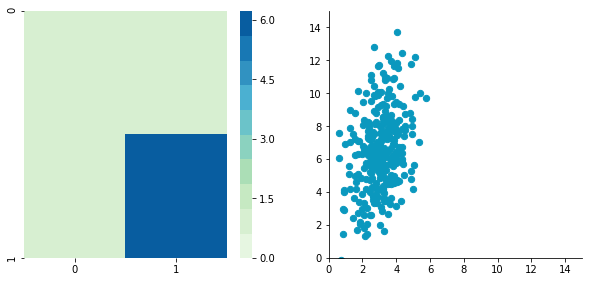

In [31]:
np.random.seed(1234)
c1 =  np.random.normal(3, 1, 300)
c2 = c1 + np.random.normal(7, 5, 300)/2.
C = np.array([c1, c2]).T

plotDataAndCov(C)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()
plt.close()

Covariance matrix:
 [[1.         0.34500274]
 [0.34500274 1.        ]]


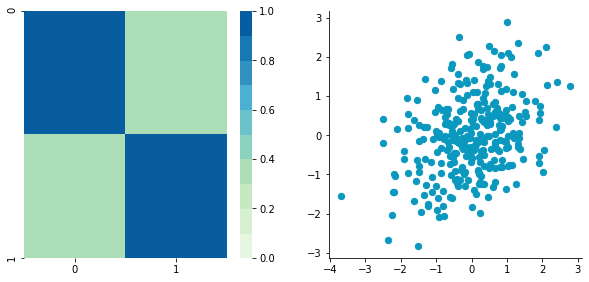

In [32]:
CStandardized = standardize(C)

plotDataAndCov(CStandardized)
plt.show()
plt.close()

#### Whitening

Whitening, or sphering, data means that we want to transform it to have a covariance matrix that is the identity matrix — 1 in the diagonal and 0 for the other cells. It is called whitening in reference to white noise.

##### Zero-centering

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


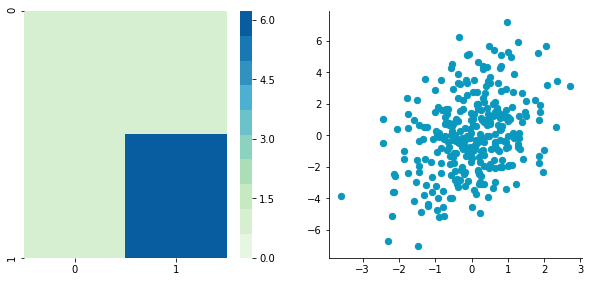

In [33]:
CCentered = center(C)

plotDataAndCov(CCentered)
plt.show()
plt.close()

##### Decorrelate

In [34]:
def decorrelate(X):
    newX = center(X)
    cov = X.T.dot(X)/float(X.shape[0])
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    return decorrelated

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


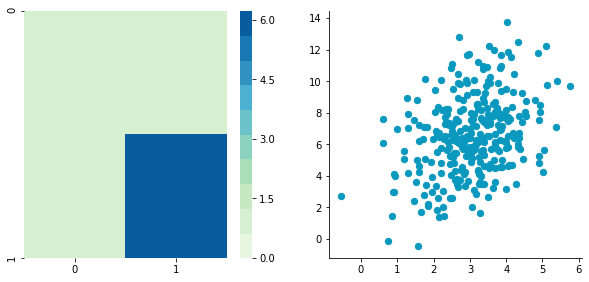

Covariance matrix:
 [[8.21222171e-01 8.28966525e-17]
 [8.28966525e-17 6.35579346e+00]]


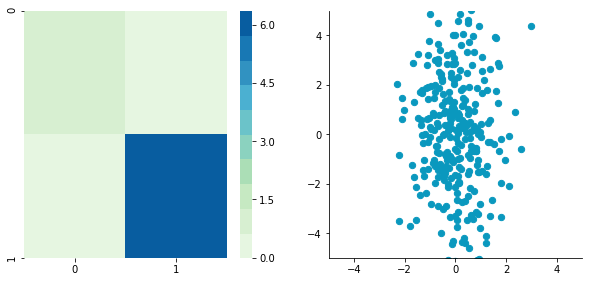

In [35]:
plotDataAndCov(C)
plt.show()
plt.close()

CDecorrelated = decorrelate(CCentered)
plotDataAndCov(CDecorrelated)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

##### Rescale the data

In [36]:
def whiten(X):
    newX = center(X)
    cov = X.T.dot(X)/float(X.shape[0])
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    # Rescale the decorrelated data
    whitened = decorrelated / np.sqrt(eigVals + 1e-5)
    return whitened

Covariance matrix:
 [[9.99987823e-01 2.51650552e-17]
 [2.51650552e-17 9.99998427e-01]]


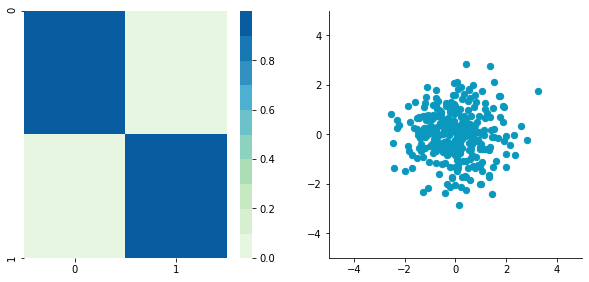

In [37]:
CWhitened = whiten(CCentered)

plotDataAndCov(CWhitened)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

### Image whitening

In [38]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape

Using TensorFlow backend.


(50000, 32, 32, 3)

In [39]:
X = X_train[:1000]
print(X.shape)

(1000, 32, 32, 3)


In [40]:
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
print(X.shape)

(1000, 3072)


In [41]:
def plotImage(X):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(32,32,3))
    plt.show()
    plt.close()

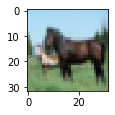

In [42]:
plotImage(X[12, :])

#### Rescale the images to obtain the range [0, 1]

In [43]:
X_norm = X / 255.
print('X.min()', X_norm.min())
print('X.max()', X_norm.max())

X.min() 0.0
X.max() 1.0


#### Subtract the mean from all images

In [44]:
X_norm.mean(axis=0).shape

(3072,)

In [45]:
X_norm.mean(axis=0)

array([0.5234    , 0.54323137, 0.5274    , ..., 0.50369804, 0.50011765,
       0.45227451])

In [46]:
X_norm = X_norm - X_norm.mean(axis=0)

In [47]:
X_norm.mean(axis=0)

array([-5.30575583e-16, -5.98021632e-16, -4.23439062e-16, ...,
       -1.81965554e-16, -2.49800181e-16,  3.98570066e-17])

In [48]:
X_norm.mean(axis=0)

array([-5.30575583e-16, -5.98021632e-16, -4.23439062e-16, ...,
       -1.81965554e-16, -2.49800181e-16,  3.98570066e-17])

#### Covariance matrix of the zero-centered data

In [49]:
cov = np.cov(X_norm, rowvar=True)

#### Rotate our dataset with SVD

In [50]:
U,S,V = np.linalg.svd(cov)

In [51]:
print(U.shape, S.shape)

(1000, 1000) (1000,)


In [52]:
print(np.diag(S))
print('\nshape:', np.diag(S).shape)

[[8.15846654e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.68234845e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.41075267e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.92727365e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.52614473e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.35907202e-15]]

shape: (1000, 1000)


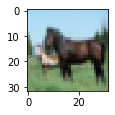

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


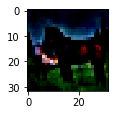

In [53]:
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm)

plotImage(X[12, :])
plotImage(X_ZCA[12, :])

In [54]:
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
print('min:', X_ZCA_rescaled.min())
print('max:', X_ZCA_rescaled.max())

min: 0.0
max: 1.0


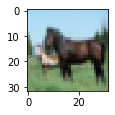

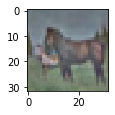

In [55]:
plotImage(X[12, :])
plotImage(X_ZCA_rescaled[12, :])

## Make Your Own Neural Network - Part2

### Teach Python

In [56]:
2*3

6

In [57]:
print("Hello World")

Hello World


In [58]:
x = 10 
print(x)
print(x+5)

y = x+7
print(y)

10
15
17


In [59]:
try:
    print(z)
except NameError:
    logging.error("name 'z' is not defined")

ERROR:root:name 'z' is not defined


In [60]:
list( range(10) )

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [61]:
for n in range(10):
    print(n)
    pass
print("done")

0
1
2
3
4
5
6
7
8
9
done


In [62]:
for n in range(10):
    print("The square of", n, "is", n*n)
    pass
print("done")

The square of 0 is 0
The square of 1 is 1
The square of 2 is 4
The square of 3 is 9
The square of 4 is 16
The square of 5 is 25
The square of 6 is 36
The square of 7 is 49
The square of 8 is 64
The square of 9 is 81
done


In [63]:
#the following prints out the cube of 2
print(2**3)

8


In [64]:
def avg(x,y): 
    print("first input is", x)
    print("second input is", y)
    a = (x+y) / 2.0
    print("average is", a)
    return a

In [65]:
avg(2,4)

first input is 2
second input is 4
average is 3.0


3.0

In [66]:
avg(200,301)

first input is 200
second input is 301
average is 250.5


250.5

In [67]:
a = np.zeros( [3,2] )
print(a)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [68]:
a[0,0] = 1
a[0,1] = 2
a[1,0] = 9
a[2,1] = 12
print(a)

[[ 1.  2.]
 [ 9.  0.]
 [ 0. 12.]]


In [69]:
print(a[0,1])
v = a[1,0]
print(v)

2.0
9.0


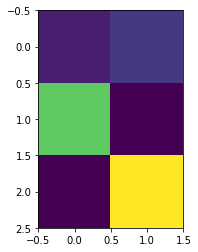

In [70]:
plt.imshow(a, interpolation="nearest")

In [71]:
#class for a dog object
class Dog:
    #dogs can bark()
    def bark(self):
        print("woof!")
        pass
    pass

In [72]:
sizzles = Dog()

In [73]:
sizzles.bark()

woof!


In [74]:
mutley = Dog()
mutley.bark()

woof!


In [75]:
class Dog:
    
    #initialisation method with internal data
    def __init__(self, petname, temp):
        self.name = petname;
        self.temperature = temp;
    
    #get status
    def status(self):
        print("dog name is", self.name)
        print("dog temperature is", self.temperature)
        pass
    
    #set temperature
    def setTemperature(self,temp):
        self.temperature = temp;
        pass
    
    #dogs can bark
    def bark(self):
        print("woof!")
        pass
    
    pass

In [76]:
#create a new dog object from the Dog class
lassie = Dog("Lassie", 37)

In [77]:
lassie.status()

dog name is Lassie
dog temperature is 37


In [78]:
lassie.setTemperature(40)

In [79]:
lassie.status()

dog name is Lassie
dog temperature is 40


### Neural Network

In [80]:
# neural network class definition 
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        #learning rate
        self.lr = learningrate
        
        #activation function
        self.activation_function = lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        
        pass
    
    #train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        targets = np.array(targets_list, ndmin=2).T
        
        # error is the (target-acutal)
        output_errors = targets - final_outputs
        #hidden layer error
        hidden_errors = np.dot(self.who.T, output_errors)
        
        #update the weights for links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1-final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass
        
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    # backquery the neural network
    def backquery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = np.array(targets_list, ndmin=2).T
        
        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = np.dot(self.who.T, final_inputs)
        
        # scale them back to 0.01 to .99
        hidden_outputs -= np.min(hidden_outputs)
        hidden_outputs /= np.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = np.dot(self.wih.T, hidden_inputs)
        
        # scale them back to 0.01 to .99
        inputs -= np.min(inputs)
        inputs /= np.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs

In [81]:
# number of input, hidden, and output nodes
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

#learning rate is 0.3
learning_rate = 0.3

#create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [82]:
n.query([1.0, 0.5, -1.5])

array([[0.40572906],
       [0.43155437],
       [0.590608  ]])

### MINST data

#### Load and Explore 

In [83]:
data_file = open('mnist_dataset/mnist_train_100.csv', 'r')
data_list = data_file.readlines()
data_file.close()

In [84]:
len(data_list)

100

In [85]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

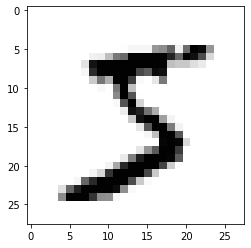

In [86]:
all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

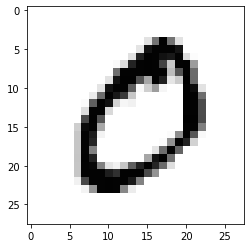

In [87]:
all_values = data_list[1].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

#### Prepare the MNIST Training Data

In [88]:
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [89]:
onodes = 10 
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

In [90]:
print(targets)

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


### Train the Neural Network

In [91]:
# number of input, hidden and output nodes 
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate is 0.3 
learning_rate = 0.3

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [92]:
# load the mnist training data CSV file into a list 
training_data_file = open("mnist_dataset/mnist_train_100.csv", 'r') 
training_data_list = training_data_file.readlines() 
training_data_file.close()

In [93]:
# train the neural network
# go through all records in the training data set 

for record in training_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
    # create the target output values (all 0.01, except the desired label which is 0.99)
    targets = np.zeros(output_nodes) + 0.01
    
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

### Test the Network

In [94]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

#### Manually run one tests

In [95]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


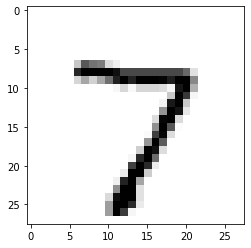

In [96]:
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [97]:
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.13702638],
       [0.10977682],
       [0.0538446 ],
       [0.1529171 ],
       [0.14510062],
       [0.05379499],
       [0.04885935],
       [0.39387842],
       [0.14932815],
       [0.08573633]])

#### All test set

In [98]:
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    #correct answer is the first value
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    #scale and shift inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    #query output
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    print(label, "network's answer")
    #append correct or incorrect to list
    if (label == correct_label):
        #if match, add 1
        scorecard.append(1)
    else:
        #doesn't match, add 0
        scorecard.append(0)
        pass
    pass

7 correct label
7 network's answer
2 correct label
3 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
1 network's answer
5 correct label
1 network's answer
9 correct label
7 network's answer


In [99]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [100]:
scorecard_array = np.asarray(scorecard)
print("performance = ", scorecard_array.sum()/scorecard_array.size)

performance =  0.6


### Train and Testing with the Full Datasets

In [101]:
full_training_data_file = open("mnist_dataset/mnist_train.csv", 'r') 
full_training_data_list = full_training_data_file.readlines() 
full_training_data_file.close()

In [102]:
full_test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
full_test_data_list = full_test_data_file.readlines()
full_test_data_file.close()

In [103]:
# train the neural network
# go through all records in the training data set 

for record in full_training_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
    # create the target output values (all 0.01, except the desired label which is 0.99)
    targets = np.zeros(output_nodes) + 0.01
    
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [104]:
full_scorecard = []

for record in full_test_data_list:
    all_values = record.split(',')
    #correct answer is the first value
    correct_label = int(all_values[0])
    #scale and shift inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    #query output
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    #append correct or incorrect to list
    if (label == correct_label):
        #if match, add 1
        full_scorecard.append(1)
    else:
        #doesn't match, add 0
        full_scorecard.append(0)
        pass
    pass

In [105]:
full_scorecard_array = np.asarray(full_scorecard)
print("performance = ", full_scorecard_array.sum()/full_scorecard_array.size)

performance =  0.9435


#### Some improvements: Tweaking the Learning Rate

In [106]:
def train():
    for record in full_training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass

In [107]:
def test():
    full_scorecard = []
    
    for record in full_test_data_list:
        all_values = record.split(',')
        #correct answer is the first value
        correct_label = int(all_values[0])
        #scale and shift inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        #query output
        outputs = n.query(inputs)
        label = np.argmax(outputs)
        #append correct or incorrect to list
        if (label == correct_label):
            #if match, add 1
            full_scorecard.append(1)
        else:
            #doesn't match, add 0
            full_scorecard.append(0)
            pass
    
    full_scorecard_array = np.asarray(full_scorecard)
    return full_scorecard_array.sum()/full_scorecard_array.size

#### Some improvements: Doing Multiple Runs

In [108]:
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, 0.1)
epochs = 2 
for e in range(epochs):
    train()

In [109]:
test()

0.96

#### Some improvements: Change Network Shape

In [110]:
n = neuralNetwork(input_nodes, 300, output_nodes, 0.1)
train()
test()

0.956

### Final Code

In [111]:
# number of input, hidden and output nodes 
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
epochs = 5
for e in range(epochs):
    train()
test()

0.9722

## Make Your Own Neural Network - Part3

### Your Own Handwriting

In [112]:
files = os.listdir('/Users/martin/Desktop/2020Spring/CSCI420/ps0/hand_pics')

In [113]:
files

['pic1.png',
 'pic3.png',
 'pic2.png',
 'pic6.png',
 'pic5.png',
 'pic4.png',
 '.ipynb_checkpoints']

In [114]:
pic_stores = []
for i in range(len(files)):
    if '.png' in files[i]:
        pic1 = imageio.imread('hand_pics/'+files[i], as_gray = True)
        pic_stores.append(pic1)

In [115]:
def data_trans(img_array):
    img_data = 255.0 - img_array.reshape(784)
    img_data = (img_data / 255.0 * 0.99) + 0.01
    return img_data

In [116]:
img_data_list = []
for i in range(len(pic_stores)):
    pic2 = data_trans(pic_stores[i])
    img_data_list.append(pic2)

neural network says: 5


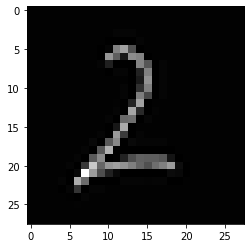

neural network says: 5


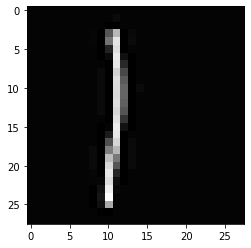

neural network says: 3


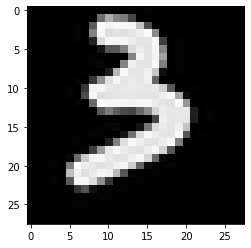

neural network says: 5


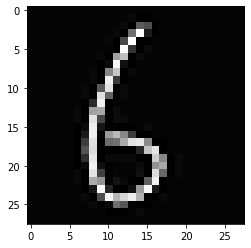

neural network says: 5


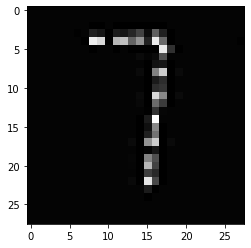

neural network says: 5


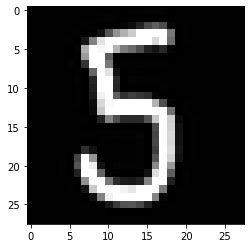

In [117]:
for i in range(len(img_data_list)):
    print('neural network says:', np.argmax(n.query(img_data_list[i])))
    plt.imshow(pic_stores[i], cmap='Greys')
    plt.pause(0.05)

### Backwards Query

We first update the neuralNetwork class in part 2 with a new method backquery

In [118]:
def create_output(label):
    targets = np.zeros(output_nodes) + 0.01
    targets[label] = 0.99
    print(targets)
    return  targets

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


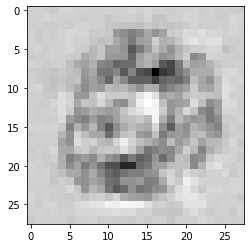

In [119]:
label0 = create_output(0)
image_data = n.backquery(label0)
plt.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')

label is 0
[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


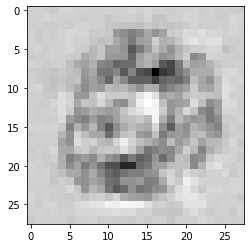

label is 1
[0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


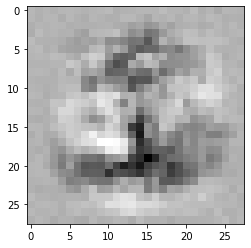

label is 2
[0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


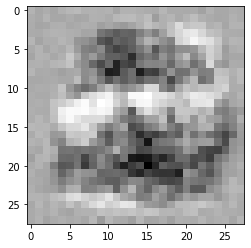

label is 3
[0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01]


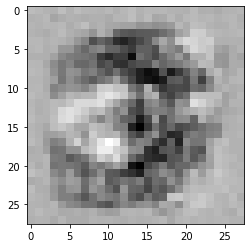

label is 4
[0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01]


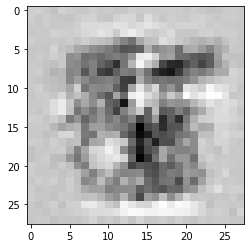

label is 5
[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]


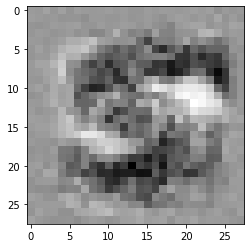

label is 6
[0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01]


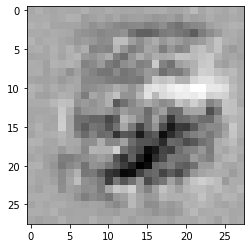

label is 7
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01]


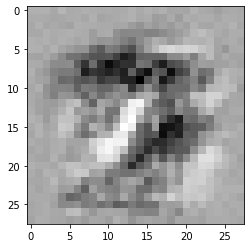

label is 8
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01]


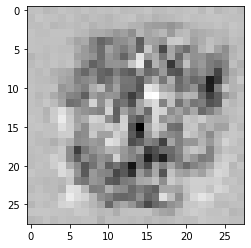

label is 9
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99]


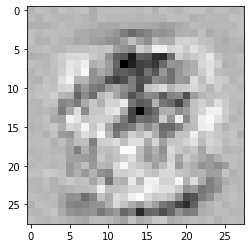

In [120]:
for i in range(10):
    print('label is', i)
    label = create_output(i)
    image_data = n.backquery(label)
    plt.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')    
    plt.pause(0.05)

### Creating New Training Data: Rotations

#### Examples

In [121]:
data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [122]:
all_values = data_list[6].split(',')
scaled_input = ((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01).reshape(28,28)

In [123]:
#create rotated variations with by rotating anticlockwise by 10 degrees
inputs_plus10_img = scipy.ndimage.interpolation.rotate(scaled_input.reshape(28,28), 10, cval=0.01, reshape=False)

#rotate clockwise by 10 degrees
inputs_minus10_img = scipy.ndimage.interpolation.rotate(scaled_input.reshape(28,28), -10, cval=0.01, reshape=False)

Text(0.5, 1.0, 'Clockwise by 10 degrees')

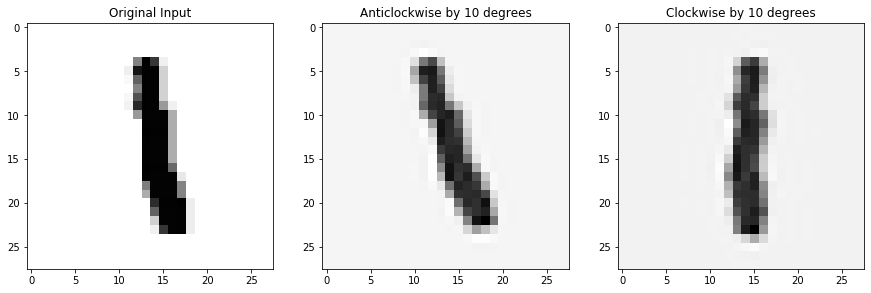

In [124]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,15))

ax1.imshow(scaled_input.reshape(28,28), cmap='Greys')
ax2.imshow(inputs_plus10_img.reshape(28,28), cmap='Greys')
ax3.imshow(inputs_minus10_img.reshape(28,28), cmap='Greys')

ax1.set_title('Original Input')
ax2.set_title('Anticlockwise by 10 degrees')
ax3.set_title('Clockwise by 10 degrees')

#### Train with new examples

In [125]:
# number of input, hidden and output nodes 
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.01

n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [126]:
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [127]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 10

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        
        ## create rotated variations
        # rotated anticlockwise by x degrees
        inputs_plusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
        n.train(inputs_plusx_img.reshape(784), targets)
        # rotated clockwise by x degrees
        inputs_minusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
        n.train(inputs_minusx_img.reshape(784), targets)
        
        # rotated anticlockwise by 10 degrees
        #inputs_plus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
        #n.train(inputs_plus10_img.reshape(784), targets)
        # rotated clockwise by 10 degrees
        #inputs_minus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
        #n.train(inputs_minus10_img.reshape(784), targets)
        
        pass
    pass

In [130]:
test()

0.9759